## Mushrooom ETL

#### Here we take raw mushroom data and build a data model to build s database in PostgreSQL
#### We will then query the data to extract some information

In [149]:
# Loading basic packages to load csv data file and explore it
import pandas as pd
import numpy as np

mushroom_data = pd.read_csv("1987_data.csv")
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [150]:
# Checking for shape of the dataframe loaded and the features. 
display(mushroom_data.shape)
display(mushroom_data.columns)

(8124, 23)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

#### Observations:
* There are 8124 unique entries for mushrooms
* Mushrooms are classifies ad Poisonous or Edible
* There are 22 features for each unique entries 
#### Next Steps:
* As we explored the data in depth in our Exploratory Data Analysis we determined to build the data model with the following tables:
    * Main Mushroom Data with unique mushroom_ids
    * A table each for gill, cap, veil and stalk features


#### Below is the final data model we build:

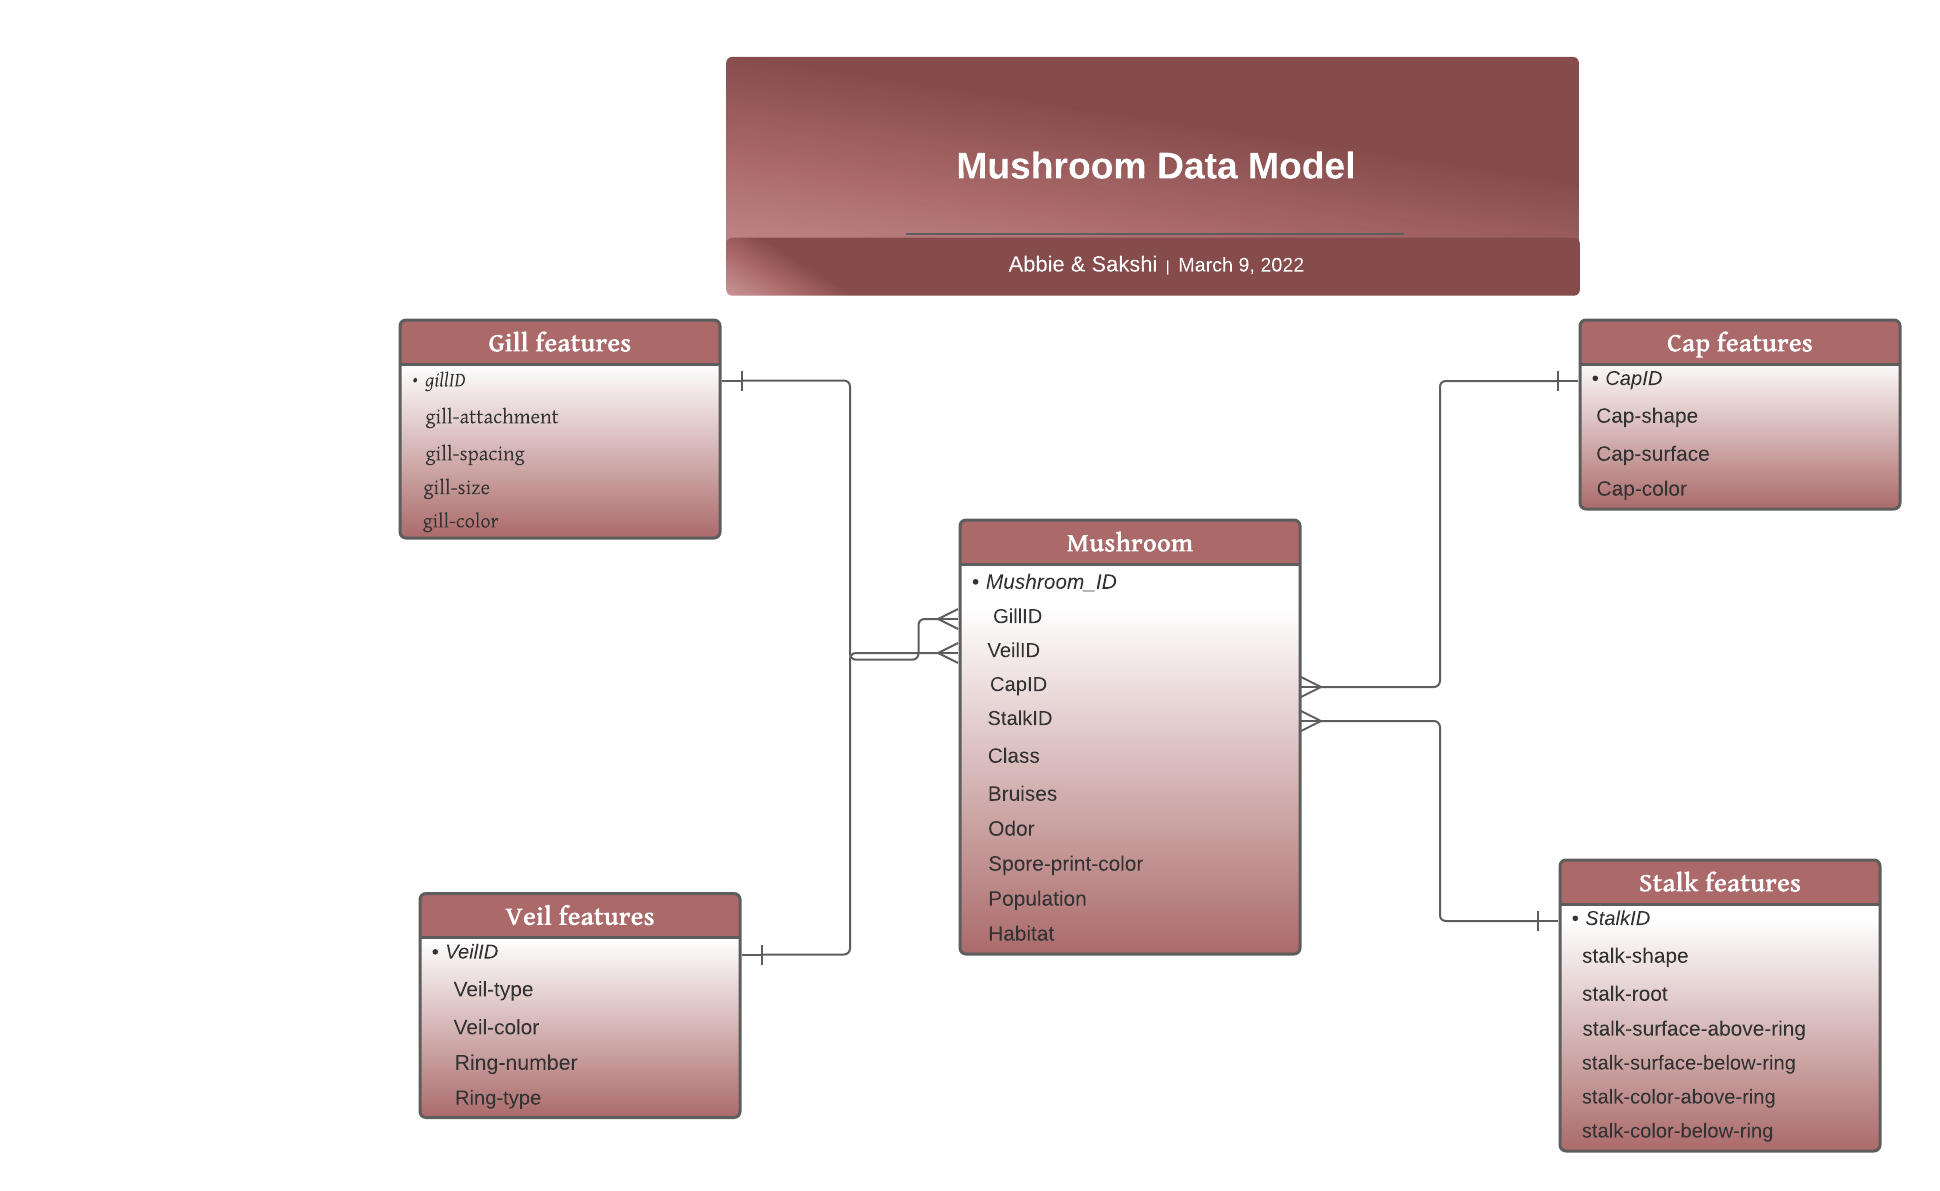

##### Need to first do a step of preprocessing the column name. Where we replace hyphen with underscore, as postgresql doesn't sllow hyphen in column names of table

In [151]:

mushroom_data.columns = mushroom_data.columns.str.replace('-','_')
mushroom_data.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [154]:
# Creating seperate dataframes for Gill, cap, veil and stalk features

# Will drop duplicates and the create a unique id for each dataframe

mushroom = mushroom_data[['class','bruises', 'odor','spore_print_color','population', 'habitat']]
gill_features = mushroom_data[['gill_attachment', 'gill_spacing', 'gill_size', 'gill_color']]
cap_features = mushroom_data[['cap_shape', 'cap_surface', 'cap_color']]
veil_features = mushroom_data[['veil_type', 'veil_color', 'ring_number', 'ring_type']]
stalk_features = mushroom_data[['stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring']]


In [155]:
# We have created seperate dataframes for the table. Now need to create the unique IDs for each of them.

# Defining a function to create a unique identifier

def create_uid(df):
    ID = df.sum(axis=1)
    return ID

In [156]:
# ignoring Warning for chained assignments
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Calling function to create Uids for each table

mushroom['mushroom_ID'] = mushroom_data['mushroom_ID'] = create_uid(mushroom_data)
mushroom['gillID'] = gill_features['gillID'] = create_uid(gill_features)
mushroom['capID'] = cap_features['capID'] = create_uid(cap_features)
mushroom['veilID'] = veil_features['veilID'] = create_uid(veil_features)
mushroom['stalkID'] = stalk_features['stalkID'] = create_uid(stalk_features)

In [157]:
mushroom_data

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,mushroom_ID
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,pxsntpfcnkeesswwpwopksu
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,exsytafcbkecsswwpwopnng
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,ebswtlfcbnecsswwpwopnnm
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,pxywtpfcnneesswwpwopksu
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,exsgfnfwbktesswwpwoenag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,o,o,p,o,o,p,b,c,l,eksnfnacbye?ssoopoopbcl
8120,e,x,s,n,f,n,a,c,b,y,...,o,o,p,n,o,p,b,v,l,exsnfnacbye?ssoopnopbvl
8121,e,f,s,n,f,n,a,c,b,n,...,o,o,p,o,o,p,b,c,l,efsnfnacbne?ssoopoopbcl
8122,p,k,y,n,f,y,f,c,n,b,...,w,w,p,w,o,e,w,v,l,pkynfyfcnbt?skwwpwoewvl


In [158]:
# Checking if the mushroom ID is created uniquely for each entry
mushroom_data[['mushroom_ID']].nunique() == mushroom_data.shape[0]

mushroom_ID    True
dtype: bool

In [159]:
gill_features = gill_features.drop_duplicates(keep='first')
cap_features = cap_features.drop_duplicates(keep='first')
veil_features = veil_features.drop_duplicates(keep='first')
stalk_features = stalk_features.drop_duplicates(keep='first')

print("Final shape for 'gill_features'",gill_features.shape)
print("Final shape for 'cap_features'",cap_features.shape)
print("Final shape for 'veil_features'",veil_features.shape)
print("Final shape for 'stalk_features'",stalk_features.shape)

Final shape for 'gill_features' (34, 5)
Final shape for 'cap_features' (90, 4)
Final shape for 'veil_features' (10, 5)
Final shape for 'stalk_features' (63, 7)


In [160]:
# Creating CSVs for each dataframe to help with loading into database

mushroom.to_csv("mushroom.csv", index=False)
gill_features.to_csv("gill_features.csv", index=False)
cap_features.to_csv("cap_features.csv", index=False)
veil_features.to_csv("veil_features.csv", index=False)
stalk_features.to_csv("stalk_features.csv", index=False)

#### Creating database in PostgreSQL

In [121]:
import psycopg2

from passwords import password

conn = psycopg2.connect(host='localhost', dbname='postgres', user='postgres', password=password)

conn.autocommit = True

cursor = conn.cursor()

#Preparing query to create a database
sql = '''CREATE database mushroom_data''';

#Creating a database
cursor.execute(sql)
print("Database created successfully........")

#Closing the connection
conn.close()

Database created successfully........


#### Creating table 'mushroom' and loading the data

In [144]:
conn = psycopg2.connect(host='localhost', dbname='mushroom_data', user='postgres', password=password)

cursor = conn.cursor()

cursor.execute("""CREATE TABLE mushroom(
    Class text,  
    Bruises text, 
    Odor text, 
    Spore_print_color text,
    Population text, 
    Habitat text, 
    mushroom_ID text PRIMARY KEY,
    GillID text,
    CapID text,
    VeilID text,
    StalkID text
)
""")
conn.commit()
print("Table created")
conn.close()

Table created


In [145]:
conn = psycopg2.connect(host='localhost', dbname='mushroom_data', user='postgres', password=password)

cursor = conn.cursor()

with open('mushroom.csv', 'r') as f:
    next(f) # Skip the header row.
    cursor.copy_from(f, 'mushroom', sep=',',null='')
    
conn.commit()
conn.close()

#### Creating table 'gill_features' and loading the data

In [162]:
conn = psycopg2.connect(host='localhost', dbname='mushroom_data', user='postgres', password=password)

cursor = conn.cursor()

cursor.execute("""CREATE TABLE gill_features(
    gill_attachment text,  
    gill_spacing text, 
    gill_size text, 
    gill_color text, 
    gillID text PRIMARY KEY
)
""")
conn.commit()
print("Table created")
conn.close()

Table created


In [163]:
conn = psycopg2.connect(host='localhost', dbname='mushroom_data', user='postgres', password=password)

cursor = conn.cursor()

with open('gill_features.csv', 'r') as f:
    next(f) # Skip the header row.
    cursor.copy_from(f, 'gill_features', sep=',',null='')
    
conn.commit()
conn.close()

#### Creating table 'cap_features' and loading the data

In [167]:
conn = psycopg2.connect(host='localhost', dbname='mushroom_data', user='postgres', password=password)

cursor = conn.cursor()

cursor.execute("""CREATE TABLE cap_features(
    cap_shape text,  
    cap_surface text, 
    cap_color text,
    capID text PRIMARY KEY
)
""")
conn.commit()
print("Table created")
conn.close()

Table created


In [168]:
conn = psycopg2.connect(host='localhost', dbname='mushroom_data', user='postgres', password=password)

cursor = conn.cursor()

with open('cap_features.csv', 'r') as f:
    next(f) # Skip the header row.
    cursor.copy_from(f, 'cap_features', sep=',',null='')
    
conn.commit()
conn.close()

#### Creating table 'veil_features' and loading the data

In [170]:
conn = psycopg2.connect(host='localhost', dbname='mushroom_data', user='postgres', password=password)

cursor = conn.cursor()

cursor.execute("""CREATE TABLE veil_features(
    veil_type text,  
    veil_color text, 
    ring_number text, 
    ring_type text, 
    veilID text PRIMARY KEY
)
""")
conn.commit()
print("Table created")
conn.close()

Table created


In [171]:
conn = psycopg2.connect(host='localhost', dbname='mushroom_data', user='postgres', password=password)

cursor = conn.cursor()

with open('veil_features.csv', 'r') as f:
    next(f) # Skip the header row.
    cursor.copy_from(f, 'veil_features', sep=',',null='')
    
conn.commit()
conn.close()

#### Creating table 'stalk_features' and loading the data

In [173]:
conn = psycopg2.connect(host='localhost', dbname='mushroom_data', user='postgres', password=password)

cursor = conn.cursor()

cursor.execute("""CREATE TABLE stalk_features(
    stalk_shape text,  
    stalk_root text, 
    stalk_surface_above_ring text, 
    stalk_surface_below_ring text, 
    stalk_color_above_ring text, 
    stalk_color_below_ring text, 
    stalkID text PRIMARY KEY
)
""")
conn.commit()
print("Table created")
conn.close()

Table created


In [174]:
conn = psycopg2.connect(host='localhost', dbname='mushroom_data', user='postgres', password=password)

cursor = conn.cursor()

with open('stalk_features.csv', 'r') as f:
    next(f) # Skip the header row.
    cursor.copy_from(f, 'stalk_features', sep=',',null='')
    
conn.commit()
conn.close()

#### Now the data is successfully loaded into postgreSQL database names "mushroom_data"
#### Running some queries now

##### 1. In which habitat are the most edible mushrooms found?

In [203]:
with psycopg2.connect(host='localhost', dbname='mushroom_data', user='postgres', password=password) as conn:

    query = """SELECT habitat, count(mushroom_id) AS edible_count
                FROM mushroom
                WHERE class = 'e'
                group by habitat
                order by count(mushroom_id) DESC"""
    
    habitat_edible = pd.read_sql_query(query,conn)

habitat_edible.head()

,habitat,edible_count
0,d,1880
1,g,1408
2,m,256
3,l,240
4,w,192


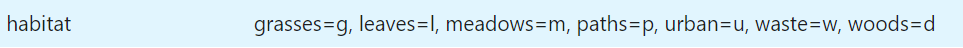

* Query results clearly show that most edible mushrooms are found in woods and grassy areas 

##### 2. Does odor helps in classifying mushroom as edible or poisonous?

In [198]:
with psycopg2.connect(host='localhost', dbname='mushroom_data', user='postgres', password=password) as conn:

    query = """SELECT class, odor, count(mushroom_id) AS count
                FROM mushroom
                group by class, odor
                order by count(mushroom_id) DESC"""
    
    odor_class = pd.read_sql_query(query,conn)

odor_class.head()

,class,odor,count
0,e,n,3408
1,p,f,2160
2,p,y,576
3,p,s,576
4,e,l,400


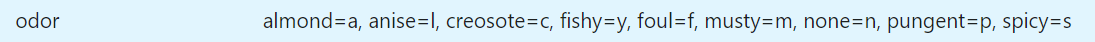

* Mostly mushrooms without any odor are edible. 
* Foul or fishy smelling mushrooms are most likely poisonous. 

##### 3. For the mushrooms with some kind of of odor , how does gill color help classify? 

In [204]:
with psycopg2.connect(host='localhost', dbname='mushroom_data', user='postgres', password=password) as conn:

    query = """SELECT class, gill_color, count(mushroom_id) as no_of_mushrooms
                FROM mushroom as m
				left join gill_features as g
				on m.gillID = g.gillID
				where m.odor not in ('n')
				group by gill_color, class
				order by count(mushroom_id) DESC"""
    
    gill_color = pd.read_sql_query(query,conn)

gill_color.head()

,class,gill_color,no_of_mushrooms
0,p,b,1728
1,p,p,640
2,p,h,528
3,p,g,480
4,e,w,224


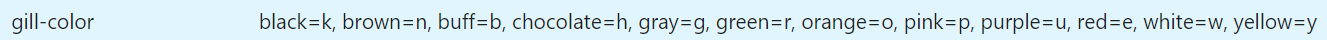

* Mushroom having buff gill color and some kind of odor is definitely poisonous